In [1]:
laptop = False

if laptop:
    rootF = 'C:/Users/goethas/'
else:
    rootF = '/home/sarah/'

In [2]:
import os
import sys
from matplotlib.pyplot import *
from numpy import *
from tqdm.auto import tqdm
import itertools
import csv
import h5py
import matplotlib.gridspec as gds
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import pickle
import pandas as pd
import matplotlib.patches as pcs


# Import diverse functions
from shared.functions import fit_gaussian, get_ellipse_parameters, plot_dendrogram
from shared.save_load import *

sys.path.append(rootF + '/Documents/GitHub/Stimuli-Generation/Checkerboard/')
from checkerboard import Checkerboard

# For clustering
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

In [12]:
# Get Euler stim profile
def get_euler():
    if laptop:
        vec_path = 'E:/MEA data/exp19/STIMS/Euler/'
    else:
        vec_path = '/mnt/ad978934-bc32-4a32-abbf-287b415f9e41/MEA data/exp19/STIMS/Euler/'
        
    vec_path = vec_path + r"euler.vec"
    euler_vec = np.genfromtxt(vec_path)

    return euler_vec

In [3]:
exp = 20211129

# Load data

Loading pre-processed data.

In [4]:
data_path = rootF + 'Documents/Myopia/Data analysis/Blur experiments/exp' + str(exp) + '/'

cell_data = load_obj(data_path + 'cells_characterization_data_NEW_' + str(exp))

good_clusters = list(cell_data.keys())

print (len(good_clusters), 'clusters')
print (good_clusters)

181 clusters
[1, 2, 14, 22, 25, 27, 28, 32, 40, 42, 43, 44, 45, 50, 61, 63, 68, 69, 72, 76, 77, 79, 80, 81, 84, 86, 96, 100, 103, 109, 112, 119, 120, 123, 124, 125, 126, 127, 129, 131, 140, 141, 153, 154, 157, 170, 172, 177, 182, 184, 187, 188, 192, 196, 197, 198, 199, 200, 203, 205, 206, 212, 214, 223, 224, 230, 234, 236, 242, 246, 247, 249, 256, 258, 259, 260, 262, 265, 267, 272, 273, 278, 281, 288, 291, 293, 294, 299, 305, 306, 314, 318, 330, 334, 336, 340, 341, 342, 345, 347, 350, 353, 357, 366, 375, 378, 379, 387, 389, 390, 393, 394, 395, 396, 398, 399, 401, 404, 406, 407, 408, 416, 417, 422, 424, 430, 433, 434, 435, 437, 488, 494, 500, 502, 508, 511, 514, 515, 516, 525, 533, 534, 541, 543, 545, 546, 547, 550, 552, 555, 558, 561, 565, 575, 577, 578, 579, 583, 588, 601, 602, 603, 604, 606, 613, 614, 619, 621, 623, 625, 648, 662, 667, 671, 673, 675, 677, 681, 682, 684, 692]


# Get ellipses

In [5]:
for cell_index in range(len(good_clusters)):
    cell_id = good_clusters[cell_index]
    
    ### Spatial STA
    spatial = cell_data[cell_id]['spatial_sta']
    # Gaussian fit
    x_fit, y_fit, fitted_spatial_sta , parameters = fit_gaussian(spatial)

    # Get ellipse parameters
    factor_sigma = 2 # TODO: correct?
    x0, y0, width, height, angle = get_ellipse_parameters(parameters, factor=factor_sigma)
    
    cell_data[cell_id]["ellipseSigmaXY"] = width, height

/home/sarah/Documents/GitHub/Retina_clusters_analysis/shared/functions.py:305: RuntimeWarning: divide by zero encountered in double_scalars
  a = + (np.cos(theta)**2) / (2 * sigma_x**2) + (np.sin(theta)**2) / (2 * sigma_y**2)
/home/sarah/Documents/GitHub/Retina_clusters_analysis/shared/functions.py:305: RuntimeWarning: invalid value encountered in double_scalars
  a = + (np.cos(theta)**2) / (2 * sigma_x**2) + (np.sin(theta)**2) / (2 * sigma_y**2)
/home/sarah/Documents/GitHub/Retina_clusters_analysis/shared/functions.py:306: RuntimeWarning: invalid value encountered in double_scalars
  b = - (np.sin(2 * theta)) / (4 * sigma_x**2) + (np.sin(2 * theta)) / (4 * sigma_y**2)
/home/sarah/Documents/GitHub/Retina_clusters_analysis/shared/functions.py:307: RuntimeWarning: invalid value encountered in double_scalars
  c = + (np.sin(theta)**2) / (2 * sigma_x**2) + (np.cos(theta)**2) / (2 * sigma_y**2)
/home/sarah/Documents/GitHub/Retina_clusters_analysis/shared/functions.py:307: RuntimeWarning: di

# Select the cells that have a spatial STA

In [7]:
if laptop:
    results_path = 'C:/Users/goethas/Documents/Myopia/Data analysis/Blur experiments/exp' + str(exp) + '/'
else:
    results_path = '/home/sarah/Documents/Myopia/Data analysis/Blur experiments/exp' + str(exp) + '/'
    
cluster_selection = pd.read_excel(results_path + str(exp) + '_cluster_selection_NEW.xlsx', header=0)

cluster_names = cluster_selection['Cluster']
# selection = cluster_selection['Selected']
defined_STA = cluster_selection['Comments']
STA_start = cluster_selection['Spatial STA']
STA_end = cluster_selection['Sp STA END']

skip_cells = [] # very low firing rate during chirp

# Select "YES" cells with a spatial STA
selected_cells = []
which_STA = []

for i in range(len(cluster_names)):
    if cluster_names[i] not in skip_cells and defined_STA[i] != 'no STA':
        which_STA.append('start')
        selected_cells.append(cluster_names[i])
            
        
print (len(selected_cells), 'good cells!')

68 good cells!


# Cell typing

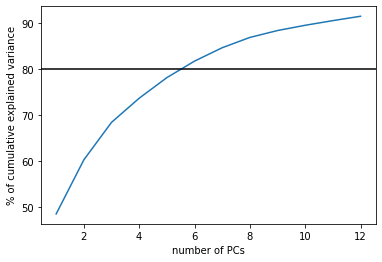

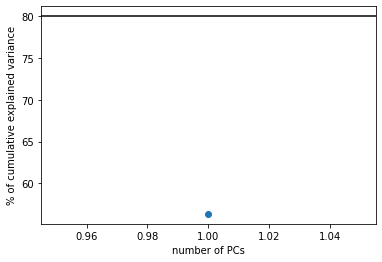

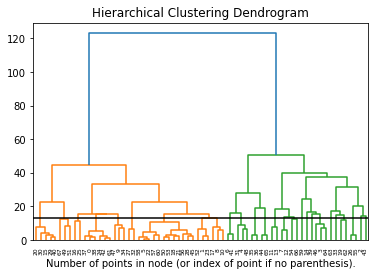

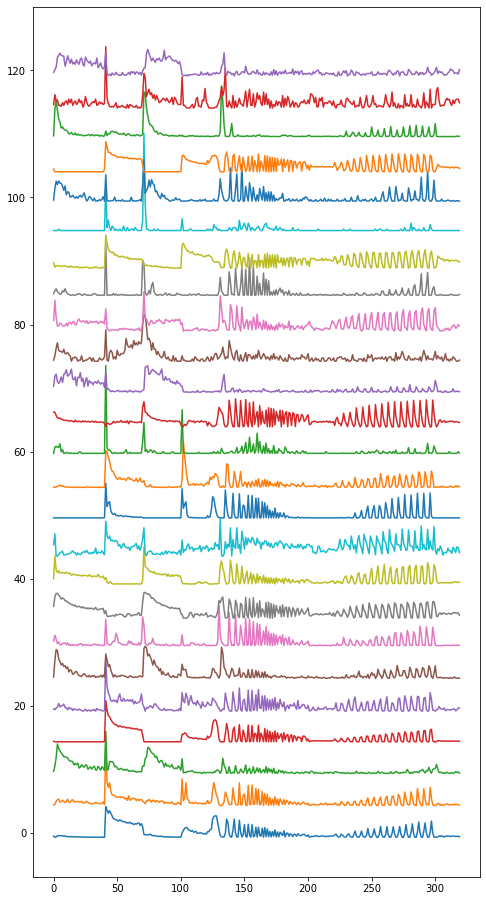

Number of clusters:  25
cluster size : 6


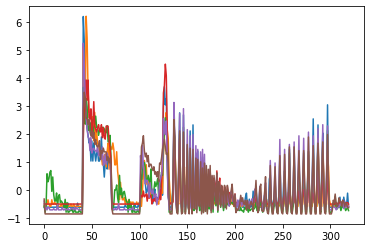

cluster size : 3


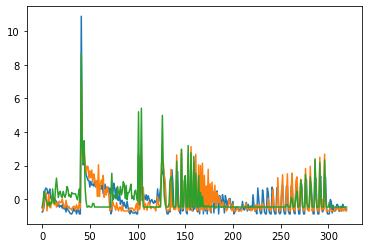

cluster size : 2


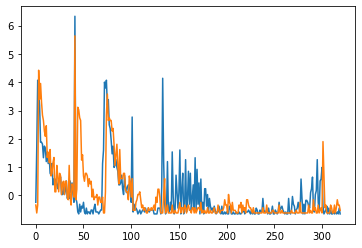

cluster size : 12


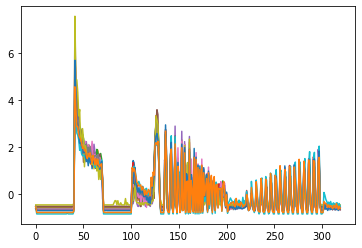

cluster size : 2


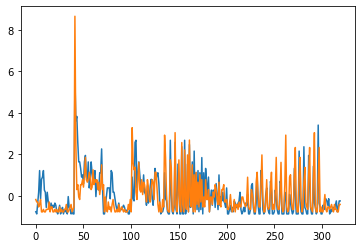

cluster size : 2


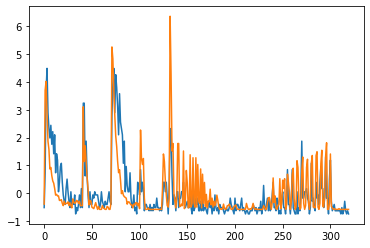

cluster size : 3


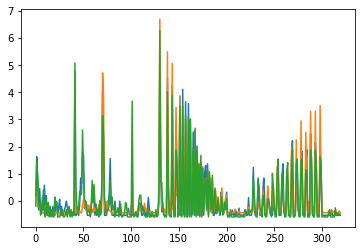

cluster size : 2


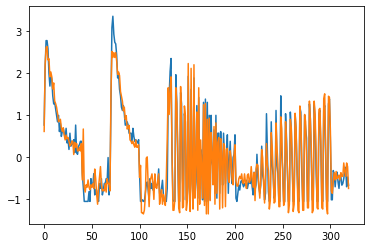

cluster size : 3


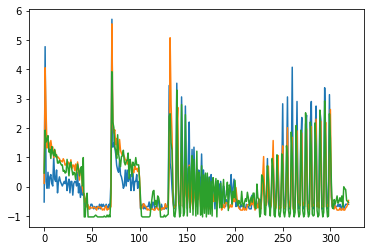

cluster size : 1


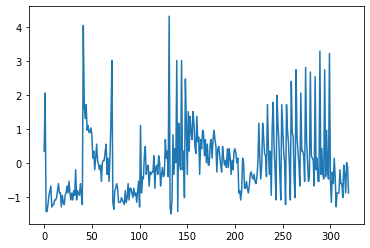

cluster size : 5


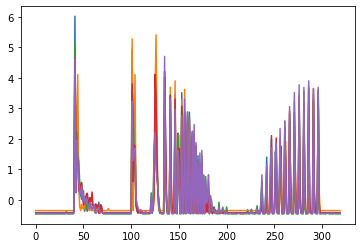

cluster size : 2


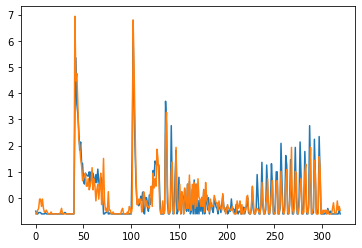

cluster size : 2


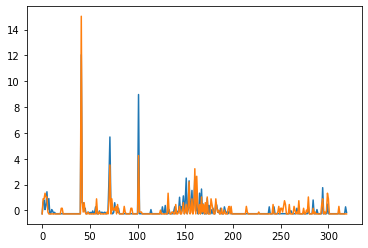

cluster size : 2


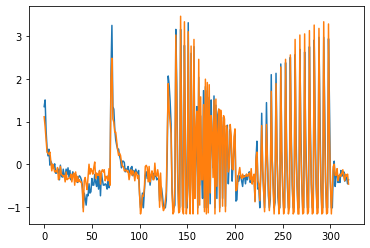

cluster size : 2


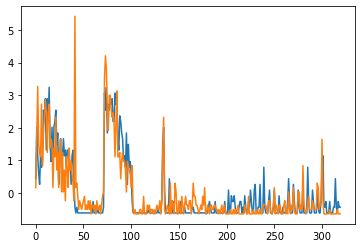

cluster size : 1


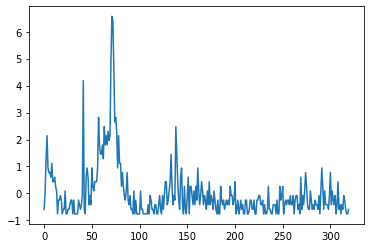

cluster size : 1


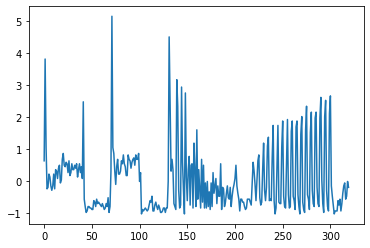

cluster size : 2


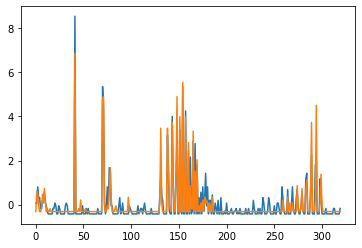

cluster size : 3


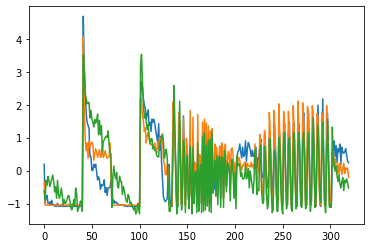

cluster size : 1


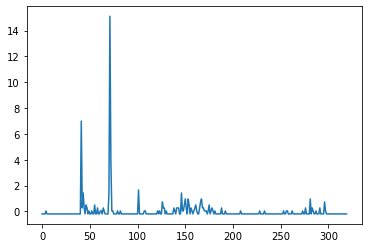

cluster size : 1


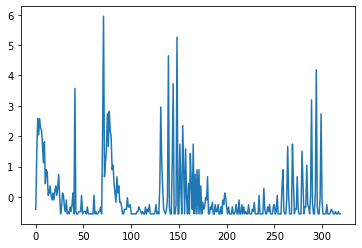

cluster size : 6


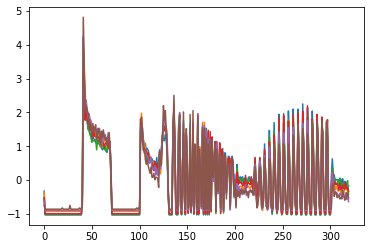

cluster size : 1


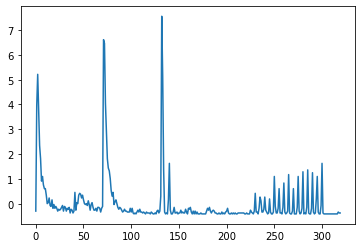

cluster size : 1


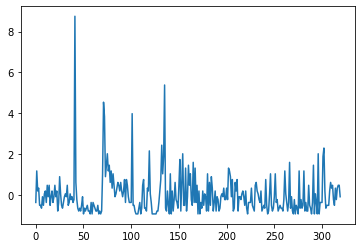

cluster size : 2


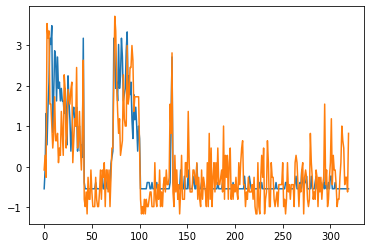

In [15]:
import scipy as sc
from sklearn.decomposition import SparsePCA
sparse=False

# change dist_thres to adapt the cut of the dendrogram and select the number of clusters
#####################################################################
dist_thres = 13
#####################################################################

n_cells = len(selected_cells)

#-----------------------------------
#-----------------------------------
# Get Euler PCA
n_rep = 20 # nb of repeats
nt = 32 # total length
dt = 0.1 # bin size
if exp==22: 
    nt=40
    dt=0.125
time_bins = np.arange(0,nt+dt,dt)

spikes = np.zeros((n_cells, int(nt/dt), n_rep))
for cell_index in range(len(selected_cells)):
    cell_id = selected_cells[cell_index]
    spike_cell = cell_data[cell_id]["spike_trains"]
    for rep in range(n_rep):
        temp=np.histogram(spike_cell[rep], bins=time_bins)
        spikes[cell_index,:,rep] = temp[0]

#-------------------------
# Pre process the PSTH
psth = np.mean(spikes, 2)
psth_z = sc.stats.zscore(psth, 1)

# Select number of PCs to keep (here 13 explain ~80% of the variance)
#####################################################################
n_components_psth = 12  #13#16
#####################################################################
if sparse:
   pca_transformer = SparsePCA(n_components_psth, random_state=0).fit(psth_z)
else:
   pca_transformer = PCA(n_components_psth).fit(psth_z)
psth_pca = pca_transformer.transform(psth_z)
# -----------------------------------
# -----------------------------------
# Get checkerboard STA PCA
STA_time_course = np.zeros((n_cells, 40))  # 40 data points for these STAs
for cell_index in range(len(selected_cells)):
    cell_id = selected_cells[cell_index]
    if which_STA[cell_index] == 'start':
        TempSTA_cell = cell_data[cell_id]["temporal_sta"]
    elif which_STA[cell_index] == 'end':
        TempSTA_cell = cell_data[cell_id]["temporal_sta2"]
    STA_time_course[cell_index] = TempSTA_cell
    
#---------------------------
# Pre process the STA
sta_tc = sc.stats.zscore(STA_time_course[:,:], 1)
#####################################################################
n_components_sta_tc = 1
#####################################################################
if n_components_sta_tc>0:
    pca_transformer2 = PCA(n_components_sta_tc).fit(sta_tc)
    sta_tc_pca = pca_transformer2.transform(sta_tc)
#-----------------------------------
#-----------------------------------
if not sparse:
    plt.plot(np.arange(n_components_psth)+1, np.cumsum(pca_transformer.explained_variance_ratio_)*100)
    plt.axhline(y=80, color='k')
    plt.xlabel('number of PCs')
    plt.ylabel('% of cumulative explained variance')
    plt.show()

    if n_components_sta_tc>0:
        plt.plot(np.arange(n_components_sta_tc)+1, np.cumsum(pca_transformer2.explained_variance_ratio_)*100,'o-')
        plt.axhline(y=80, color='k')
        plt.xlabel('number of PCs')
        plt.ylabel('% of cumulative explained variance')
        plt.show()
#-----------------------------------
#-----------------------------------
cluster_dataset = np.zeros((n_cells, n_components_psth+n_components_sta_tc+1))
cluster_dataset[:,:n_components_psth] = psth_pca
if n_components_sta_tc>0:
    cluster_dataset[:,n_components_psth:n_components_psth+n_components_sta_tc] = sta_tc_pca

ell_size=np.zeros(len(selected_cells))
for cell_index in range(len(selected_cells)):
    cell_id = selected_cells[cell_index]
    width,height = cell_data[cell_id]["ellipseSigmaXY"]
#     print (width, height)
    ell_size[cell_index] = np.abs(np.pi*width*height)
    
ell_size_temp = -np.ones(n_cells)
temp = ell_size[:]-ell_size[:].min()
ell_size_temp[:] = temp/temp.max()
cluster_dataset[:,-1] = ell_size_temp
#-----------------------------------
#-----------------------------------

# perform agglomerative clustering
model = AgglomerativeClustering(distance_threshold=dist_thres, n_clusters=None)
#model = model.fit(psth_pca)
model = model.fit(cluster_dataset)

# plot the dendrogram
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=0)
plt.axhline(dist_thres, color='k')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

# plot the cluster centroids
n_clusts = len(np.unique(model.labels_))
plt.figure(figsize=(8,16))
for iclust in range(n_clusts):
    idx_cluster = np.where(model.labels_==iclust)[0]
    plt.plot(np.mean(psth_z[idx_cluster,:], 0) + iclust * 5)
plt.show() 
    
print('Number of clusters: ',len(np.unique(model.labels_)))

# plot the psths of all cells in one cluster
for icluster in range(len(np.unique(model.labels_))):
    # icluster = 0
    idx_cluster = np.where(model.labels_==icluster)[0]
    print(f'cluster size : {len(idx_cluster)}')
    plt.figure()
    plt.plot(psth_z[idx_cluster,:].transpose())
    plt.show()

In [16]:
# Save the cluster of each cell
for cell_index in range(len(selected_cells)):
    cell_nb = selected_cells[cell_index]
    cell_data[cell_nb]["type"] = model.labels_[cell_index]

# Save the clustering results

In [18]:
# the dictionary 'call_data' with cluster type in addition
fsave = data_path + 'cells_characterization_data_with_cluster_type_' + str(exp)
save_obj(cell_data,fsave)

# the model
fsave = data_path + str(exp) + '_clustermodel'
save_obj([model,psth_z],fsave)

# selected cells
fsave = data_path + str(exp) + '_selected_cells_clustering'
save_obj(selected_cells,fsave)

# Create a summary figure for each cluster type

In [17]:
exp = 20211129

from matplotlib import gridspec

for icluster in range(len(np.unique(model.labels_)))[0:]:
    idx_cluster = np.where(model.labels_==icluster)[0]
    print(len(idx_cluster))

    gs = gridspec.GridSpec(len(idx_cluster)+2,6)
    
    if len(idx_cluster)<7:
        yspan = 2
    else:
        yspan=-2
        
    fig = figure(figsize=(14,(len(idx_cluster)+yspan)*1.75))
    plt.suptitle("Cell group {}\n {} cells".format(icluster, len(idx_cluster)))

    #-------------------------------
    # Loop cells in cluster
    line = 2
    STAs = np.zeros(40)
    STAcount = 0
    waves = np.zeros(101)
    wavecount = 0
    for index in sorted(idx_cluster):
        cell_nb = selected_cells[index]
        
        #-----------------
        # Plot temp STA
        ax= subplot(gs[line,1])
        
        ax.set_ylim([-4,4])
        ax.axis("off")
        ax.set_aspect(0.075)
        ax.step(np.linspace(-40/30,0,40),cell_data[cell_nb]["temporal_sta"],'k',lw=3)
        polarity = cell_data[cell_nb]["polarity"]
        ax.set_title('Cluster ' + str(cell_nb) + '  Polarity '+polarity)
        ax.axhline(0,color='k',lw=0.5)
        
        STAs += cell_data[cell_nb]["temporal_sta"]
        STAcount += 1
        
        #-----------------
        # Plot temp STA avg
        ax= subplot(gs[0,1])
        
        ax.set_title('Temp STA')
        ax.set_ylim([-1,1])
        ax.plot(np.linspace(-40/30,0,40),cell_data[cell_nb]["temporal_sta"],lw=0.5)
        ax.axhline(0,color='k',lw=0.5)
        ax.set_xlabel('Time(s)')
        #-----------------
        # plot Spatial STA
        ax= subplot(gs[line,0])
                
        ax.imshow(cell_data[cell_nb]["spatial_sta"], cmap='gray',interpolation='gaussian')
        ax.set_xlim(16,44)
        ax.set_ylim(44,16)
        ax.set_aspect('equal')
        #ax.set_title('Cluster' + str(cell_nb))
        ax.set_xticks([])
        ax.set_yticks([])
       
        #----------------
        #plot waveform
        ax= subplot(gs[line,2])
        
        wave = cell_data[cell_nb]["templates"]/abs(np.min(cell_data[cell_nb]["templates"]))
        ax.plot(wave,'r')
        ax.axis("off")
        ax.set_ylim([-1.25,1.25])
        waves+=wave
        wavecount+=1
        
        ax= subplot(gs[0,2])
        ax.plot(wave,lw=0.5)
        ax.axis("off")
        ax.set_ylim([-1.25,1.25])
        #-----------------
        # plot Euler
        ax= subplot(gs[line,3:])
        
        cell_index=selected_cells.index(cell_nb)
        ax.plot(np.linspace(0,32,800),cell_data[cell_nb]["psth"])
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xticks([])
        plt.locator_params(axis="y", nbins=3)
        
        #-----------------
        # plot Ellipse
        x_fit, y_fit, fitted_spatial_sta , parameters = fit_gaussian(cell_data[cell_nb]["spatial_sta"])
        
        x0, y0, width, height, angle = get_ellipse_parameters(parameters, factor=1)
        xy = (x0, y0)

        ax= subplot(gs[line,0])
        ellipse = pcs.Ellipse(xy, width, height, angle=angle, fill=False, color='r',lw=1)
        ax.add_patch(ellipse)
        
        ax= subplot(gs[0,0])
        ellipse = pcs.Ellipse(xy, width, height, angle=angle, fill=False, color='k',lw=1)
        ax.add_patch(ellipse)
        
        line+=1
    #-----------------
    # avg STA
    STAs = STAs/STAcount
    ax= subplot(gs[0,1])
    ax.plot(np.linspace(-40/30,0,40),STAs,'k',lw=2)
    ax.set_ylim([-2,2])
    ax.set_aspect(0.075)
    ax.axis("off")
    
    #-----------------
    # avg wave
    waves=waves/wavecount
    ax= subplot(gs[0,2])
    ax.set_title('Waveform')
    
    ax.plot(waves,'r',lw=2)
    ax.set_ylim([-1.25,1.25])
    #ax.set_aspect(0.075)
    ax.axis("off")
    
    #-----------------
    # size ellipses
    ax= subplot(gs[0,0])
    
    ax.set_title('Ellipses')
    ax.set_xlim(16,44)
    ax.set_ylim(44,16)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
        
    #-----------------
    # mean psth
    ax= subplot(gs[0,3:])
    ax.set_title('Euler psth')
    
    ax.plot(np.linspace(0,32,320),np.mean(psth_z[idx_cluster,:], 0),'g')
    ax.axis("off")

    #-----------------
    # plot euler stim
    euler_vec= get_euler()
    ax= subplot(gs[1,3:])
    
    ax.plot(np.linspace(0,32,1600),euler_vec[150:1750,1], color='k')
    ax.set_yticks([])
    ax.set_ylim([-100,350])
    ax.set_xlabel('Time(s)')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax= subplot(gs[1,2])
    ax.text(0.5,0.5 ,"Chirp stimulus profile")
    ax.axis("off")
    
    PDF_folder = rootF + 'Documents/Myopia/Data analysis/Blur experiments/exp' + str(exp) + '/RGC typing/clustering 13/'
    fsave = PDF_folder +'exp'+str(exp)+'_clustype' +str(icluster) 
    
    fig.savefig(fsave+'.png',format='png',dpi=250)
    close(fig)  
    
#     plt.savefig("Summary cell group {}".format(icluster))    
#     plt.show()

6
3


/home/sarah/Documents/GitHub/Retina_clusters_analysis/shared/functions.py:305: RuntimeWarning: divide by zero encountered in double_scalars
  a = + (np.cos(theta)**2) / (2 * sigma_x**2) + (np.sin(theta)**2) / (2 * sigma_y**2)
/home/sarah/Documents/GitHub/Retina_clusters_analysis/shared/functions.py:305: RuntimeWarning: invalid value encountered in double_scalars
  a = + (np.cos(theta)**2) / (2 * sigma_x**2) + (np.sin(theta)**2) / (2 * sigma_y**2)
/home/sarah/Documents/GitHub/Retina_clusters_analysis/shared/functions.py:306: RuntimeWarning: invalid value encountered in double_scalars
  b = - (np.sin(2 * theta)) / (4 * sigma_x**2) + (np.sin(2 * theta)) / (4 * sigma_y**2)
/home/sarah/Documents/GitHub/Retina_clusters_analysis/shared/functions.py:307: RuntimeWarning: invalid value encountered in double_scalars
  c = + (np.sin(theta)**2) / (2 * sigma_x**2) + (np.cos(theta)**2) / (2 * sigma_y**2)
/home/sarah/Documents/GitHub/Retina_clusters_analysis/shared/functions.py:307: RuntimeWarning: di

2
12
2
2
3


/home/sarah/Documents/GitHub/Retina_clusters_analysis/shared/functions.py:305: RuntimeWarning: divide by zero encountered in double_scalars
  a = + (np.cos(theta)**2) / (2 * sigma_x**2) + (np.sin(theta)**2) / (2 * sigma_y**2)
/home/sarah/Documents/GitHub/Retina_clusters_analysis/shared/functions.py:305: RuntimeWarning: invalid value encountered in double_scalars
  a = + (np.cos(theta)**2) / (2 * sigma_x**2) + (np.sin(theta)**2) / (2 * sigma_y**2)
/home/sarah/Documents/GitHub/Retina_clusters_analysis/shared/functions.py:306: RuntimeWarning: invalid value encountered in double_scalars
  b = - (np.sin(2 * theta)) / (4 * sigma_x**2) + (np.sin(2 * theta)) / (4 * sigma_y**2)
/home/sarah/Documents/GitHub/Retina_clusters_analysis/shared/functions.py:307: RuntimeWarning: invalid value encountered in double_scalars
  c = + (np.sin(theta)**2) / (2 * sigma_x**2) + (np.cos(theta)**2) / (2 * sigma_y**2)
/home/sarah/Documents/GitHub/Retina_clusters_analysis/shared/functions.py:307: RuntimeWarning: di

2
3
1
5
2
2
2
2
1
1
2
3
1
1
6
1
1


/home/sarah/Documents/GitHub/Retina_clusters_analysis/shared/functions.py:305: RuntimeWarning: divide by zero encountered in double_scalars
  a = + (np.cos(theta)**2) / (2 * sigma_x**2) + (np.sin(theta)**2) / (2 * sigma_y**2)
/home/sarah/Documents/GitHub/Retina_clusters_analysis/shared/functions.py:305: RuntimeWarning: invalid value encountered in double_scalars
  a = + (np.cos(theta)**2) / (2 * sigma_x**2) + (np.sin(theta)**2) / (2 * sigma_y**2)
/home/sarah/Documents/GitHub/Retina_clusters_analysis/shared/functions.py:306: RuntimeWarning: invalid value encountered in double_scalars
  b = - (np.sin(2 * theta)) / (4 * sigma_x**2) + (np.sin(2 * theta)) / (4 * sigma_y**2)
/home/sarah/Documents/GitHub/Retina_clusters_analysis/shared/functions.py:307: RuntimeWarning: invalid value encountered in double_scalars
  c = + (np.sin(theta)**2) / (2 * sigma_x**2) + (np.cos(theta)**2) / (2 * sigma_y**2)
/home/sarah/Documents/GitHub/Retina_clusters_analysis/shared/functions.py:307: RuntimeWarning: di

2


/home/sarah/Documents/GitHub/Retina_clusters_analysis/shared/functions.py:305: RuntimeWarning: divide by zero encountered in double_scalars
  a = + (np.cos(theta)**2) / (2 * sigma_x**2) + (np.sin(theta)**2) / (2 * sigma_y**2)
/home/sarah/Documents/GitHub/Retina_clusters_analysis/shared/functions.py:305: RuntimeWarning: invalid value encountered in double_scalars
  a = + (np.cos(theta)**2) / (2 * sigma_x**2) + (np.sin(theta)**2) / (2 * sigma_y**2)
/home/sarah/Documents/GitHub/Retina_clusters_analysis/shared/functions.py:306: RuntimeWarning: invalid value encountered in double_scalars
  b = - (np.sin(2 * theta)) / (4 * sigma_x**2) + (np.sin(2 * theta)) / (4 * sigma_y**2)
/home/sarah/Documents/GitHub/Retina_clusters_analysis/shared/functions.py:307: RuntimeWarning: invalid value encountered in double_scalars
  c = + (np.sin(theta)**2) / (2 * sigma_x**2) + (np.cos(theta)**2) / (2 * sigma_y**2)
/home/sarah/Documents/GitHub/Retina_clusters_analysis/shared/functions.py:307: RuntimeWarning: di

# Compare clusters responses to blur

## Load data

In [99]:
exp = 20211207

from parameters_stimulation2 import *

if laptop:
    rootF = 'C:/Users/goethas/'
else:
    rootF = '/home/sarah/'

data_path = rootF + 'Documents/Myopia/Data analysis/Blur experiments/exp' + str(exp) + '/'

blur_data = load(data_path + str(exp) + '_selected_cells_spike_count_with_noise.npz')
    
spike_counts = blur_data['spike_count']
spike_counts_mean = blur_data['spike_count_mean']
spike_counts_std = blur_data['spike_count_std']
blur_clusters = blur_data['clusters']

Ncells = len(blur_clusters)

print (shape(spike_counts))
print (blur_clusters)

(87, 4, 2, 9, 4, 25)
[  6  41  44  45  59  60  61  63  69  77  89  95  98 100 107 110 114 120
 129 148 155 161 179 182 184 186 197 205 210 217 218 220 229 235 247 253
 265 269 272 277 278 283 298 303 310 315 316 340 347 359 363 372 377 378
 381 392 393 394 395 396 398 399 405 417 418 421 426 435 458 459 462 471
 472 476 479 491 495 498 501 506 507 538 575 579 583 584 589]


## Plots

In [130]:
exp = 20211207

pup = 0

cols = ['C0','C1','C2','C3']

from matplotlib import gridspec

for icluster in range(len(np.unique(model.labels_)))[0:]:
    idx_cluster = np.where(model.labels_==icluster)[0]
    print(len(idx_cluster))

    gs = gridspec.GridSpec(len(idx_cluster)+2,10)
    
    if len(idx_cluster)<7:
        yspan = 2
    else:
        yspan=-2
        
    fig = figure(figsize=(20,(len(idx_cluster)+yspan)*2))
    plt.suptitle("Cell group {}\n {} cells".format(icluster, len(idx_cluster)))

    #-------------------------------
    # Loop cells in cluster
    line = 2
    STAs = np.zeros(40)
    STAcount = 0
    waves = np.zeros(101)
    wavecount = 0
    for index in sorted(idx_cluster):
        cell_nb = selected_cells[index]
        
        #### Clustering results
        
        #-----------------
        # Plot temp STA
        ax= subplot(gs[line,1])
        
        ax.set_ylim([-4,4])
        ax.axis("off")
        ax.set_aspect(0.075)
        ax.step(np.linspace(-40/30,0,40),cell_data[cell_nb]["temporal_sta"],'k',lw=3)
        polarity = cell_data[cell_nb]["polarity"]
        ax.set_title('Cluster ' + str(cell_nb) + '\nPolarity '+polarity)
        ax.axhline(0,color='k',lw=0.5)
        
        STAs += cell_data[cell_nb]["temporal_sta"]
        STAcount += 1
        
        #-----------------
        # Plot temp STA avg
        ax= subplot(gs[0,1])
        
        ax.set_title('Temp STA')
        ax.set_ylim([-1,1])
        ax.plot(np.linspace(-40/30,0,40),cell_data[cell_nb]["temporal_sta"],lw=0.5)
        ax.axhline(0,color='k',lw=0.5)
        ax.set_xlabel('Time(s)')
        #-----------------
        # plot Spatial STA
        ax= subplot(gs[line,0])
                
        ax.imshow(cell_data[cell_nb]["spatial_sta"], cmap='gray',interpolation='gaussian')
        ax.set_xlim(16,44)
        ax.set_ylim(44,16)
        ax.set_aspect('equal')
        #ax.set_title('Cluster' + str(cell_nb))
        ax.set_xticks([])
        ax.set_yticks([])
       
        #----------------
        #plot waveform
        ax= subplot(gs[line,2])
        
        wave = cell_data[cell_nb]["templates"]/abs(np.min(cell_data[cell_nb]["templates"]))
        ax.plot(wave,'r')
        ax.axis("off")
        ax.set_ylim([-1.25,1.25])
        waves+=wave
        wavecount+=1
        
        ax= subplot(gs[0,2])
        ax.plot(wave,lw=0.5)
        ax.axis("off")
        ax.set_ylim([-1.25,1.25])
        #-----------------
        # plot Euler
        ax= subplot(gs[line,3:6])
        
        cell_index=selected_cells.index(cell_nb)
        ax.plot(np.linspace(0,32,800),cell_data[cell_nb]["psth"])
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_xticks([])
        plt.locator_params(axis="y", nbins=3)
        
        #-----------------
        # plot Ellipse
        x_fit, y_fit, fitted_spatial_sta , parameters = fit_gaussian(cell_data[cell_nb]["spatial_sta"])
        
        x0, y0, width, height, angle = get_ellipse_parameters(parameters, factor=1)
        xy = (x0, y0)

        ax= subplot(gs[line,0])
        ellipse = pcs.Ellipse(xy, width, height, angle=angle, fill=False, color='r',lw=1)
        ax.add_patch(ellipse)
        
        ax= subplot(gs[0,0])
        ellipse = pcs.Ellipse(xy, width, height, angle=angle, fill=False, color='k',lw=1)
        ax.add_patch(ellipse)
        
        ##### Cells reponse to blur
        index_bl = where(blur_clusters == selected_cells[index])[0]
        print (selected_cells[index], blur_clusters[index_bl])
        if len(index_bl) > 0:
            index_bl = index_bl[0]
            max_act = nanmax(spike_counts_mean[index_bl])

            for src in range(Nsources):
                ax = fig.add_subplot(gs[line, src + 6])
                for iImg in range(Nimgs):
                    ax.plot(dFs, spike_counts_mean[index_bl, iImg, pup, :, src],'-', \
                            color=cols[iImg])
                    ax.spines['top'].set_visible(False)
                    ax.spines['right'].set_visible(False)
                    ax.set_ylim(0,1.5*max_act)
                    ax.set_xlim(0, 9)
                    ax.set_xticks(dFs[::2])
                    if line == 2:
                        ax.set_title('Ecc = {}°'.format(sourcesEcc[src]))
                        ax.set_xticklabels([])
                    if src == 0:
                        ax.set_ylabel('Spike cnt')
                    else:
                        ax.set_yticks([])
                    if line == len(idx_cluster)+1:
                        ax.set_xlabel('Defocus (D)')
                    else:
                        ax.set_xticks([])
                        
#                         ax.legend(frameon=False, fontsize = 8)
        
        line+=1
    #-----------------
    # avg STA
    STAs = STAs/STAcount
    ax= subplot(gs[0,1])
    ax.plot(np.linspace(-40/30,0,40),STAs,'k',lw=2)
    ax.set_ylim([-2,2])
    ax.set_aspect(0.075)
    ax.axis("off")
    
    #-----------------
    # avg wave
    waves=waves/wavecount
    ax= subplot(gs[0,2])
    ax.set_title('Waveform')
    
    ax.plot(waves,'r',lw=2)
    ax.set_ylim([-1.25,1.25])
    #ax.set_aspect(0.075)
    ax.axis("off")
    
    #-----------------
    # size ellipses
    ax= subplot(gs[0,0])
    
    ax.set_title('Ellipses')
    ax.set_xlim(16,44)
    ax.set_ylim(44,16)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
        
    #-----------------
    # mean psth
    ax= subplot(gs[0,3:6])
    ax.set_title('Euler psth')
    
    ax.plot(np.linspace(0,32,320),np.mean(psth_z[idx_cluster,:], 0),'g')
    ax.axis("off")

    #-----------------
    # plot euler stim
    euler_vec= get_euler()
    ax= subplot(gs[1,3:6])
    
    ax.plot(np.linspace(0,32,1600),euler_vec[150:1750,1], color='k')
    ax.set_yticks([])
    ax.set_ylim([-100,350])
    ax.set_xlabel('Time(s)')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax= subplot(gs[1,2])
    ax.text(0.5,0.5 ,"Chirp stimulus profile")
    ax.axis("off")
    
    PDF_folder = rootF + 'Documents/Myopia/Data analysis/Blur experiments/exp' + str(exp) + '/RGC typing/'
    fsave = PDF_folder +'exp'+str(exp)+'_clustype' + str(icluster) + '_with_blur'
    
    fig.savefig(fsave+'.png',format='png',dpi=250)
    close(fig)  


4
sigma_x 1.0451903749435794 pixel,
sigma_y 1.9284014000645098 pixel,
amplitude: 0.1103111956233839
269 [269]
sigma_x 1.629767374602505 pixel,
sigma_y 1.0400315424754274 pixel,
amplitude: 0.12033047400415156
316 [316]
sigma_x 1.1090554444116898 pixel,
sigma_y 2.124619166762066 pixel,
amplitude: 0.07775565790533588
363 [363]
sigma_x 1.9365841111150313 pixel,
sigma_y 1.5536687935250477 pixel,
amplitude: 0.0975576608962111
587 []
10
sigma_x 1.6252036664153489 pixel,
sigma_y 2.6045342585908733 pixel,
amplitude: 0.12440053938085786
110 [110]
sigma_x 1.2125585094182934 pixel,
sigma_y 0.24739014970181888 pixel,
amplitude: 0.3458682380649288
160 []
sigma_x 2.6292596133807242 pixel,
sigma_y 1.3876587980907245 pixel,
amplitude: 0.12937665459925396
179 [179]
sigma_x 1.609390642022243 pixel,
sigma_y 2.0646646442868057 pixel,
amplitude: 0.06928197069175086
210 [210]
sigma_x 1.4510644683351115 pixel,
sigma_y 2.5330623628508286 pixel,
amplitude: 0.07222713097493112
235 [235]
sigma_x 2.992677337070519

/home/sarah/Documents/GitHub/Retina_clusters_analysis/functions.py:299: RuntimeWarning: divide by zero encountered in double_scalars
  a = + (np.cos(theta)**2) / (2 * sigma_x**2) + (np.sin(theta)**2) / (2 * sigma_y**2)
/home/sarah/Documents/GitHub/Retina_clusters_analysis/functions.py:299: RuntimeWarning: invalid value encountered in double_scalars
  a = + (np.cos(theta)**2) / (2 * sigma_x**2) + (np.sin(theta)**2) / (2 * sigma_y**2)
/home/sarah/Documents/GitHub/Retina_clusters_analysis/functions.py:300: RuntimeWarning: invalid value encountered in double_scalars
  b = - (np.sin(2 * theta)) / (4 * sigma_x**2) + (np.sin(2 * theta)) / (4 * sigma_y**2)
/home/sarah/Documents/GitHub/Retina_clusters_analysis/functions.py:301: RuntimeWarning: invalid value encountered in double_scalars
  c = + (np.sin(theta)**2) / (2 * sigma_x**2) + (np.cos(theta)**2) / (2 * sigma_y**2)
/home/sarah/Documents/GitHub/Retina_clusters_analysis/functions.py:301: RuntimeWarning: divide by zero encountered in double_

sigma_x 0 pixel,
sigma_y 0 pixel,
amplitude: 0
52 []
sigma_x 1.1280110731654622 pixel,
sigma_y -1.7139838195055206 pixel,
amplitude: 0.12188682470355598
575 [575]
sigma_x 2.780144431308804 pixel,
sigma_y 1.2338095039397519 pixel,
amplitude: 0.054796537566150064
582 []
3
sigma_x -1.5491184598931325 pixel,
sigma_y 1.0592912835397073 pixel,
amplitude: 0.12066309966511765
61 [61]
sigma_x -0.05119962195804219 pixel,
sigma_y -2.5025383571265025 pixel,
amplitude: -0.4578486295988823
182 [182]
sigma_x -1.8516897640646968 pixel,
sigma_y 1.4261655981982604 pixel,
amplitude: 0.11060219476818771
283 [283]
5
sigma_x 1.298133409042747 pixel,
sigma_y -1.8746050051683325 pixel,
amplitude: 0.1451939101960596
394 [394]
sigma_x -0.3265312677566865 pixel,
sigma_y 8.34484199298304 pixel,
amplitude: -0.015340007775215141
414 []
sigma_x -1.6046888912219042 pixel,
sigma_y 1.196288472981192 pixel,
amplitude: -0.06848984776052545
433 []
sigma_x 2.1046703501232122 pixel,
sigma_y 1.3363474285422512 pixel,
amplitu